In [1]:
import gensim.corpora as corpora
import gensim

In [2]:
def get_list_of_words(document):
    Document = []

    for a in document:
        raw = a.split(" ")
        Document.append(raw)

    return Document

In [3]:
def tfidf(_Resumes, num_topics):
    document = get_list_of_words(_Resumes['Cleaned'])

    id2word = corpora.Dictionary(document)
    corpus = [id2word.doc2bow(text) for text in document]


    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=100,
                                                update_every=3, chunksize=100, passes=50, alpha='auto', per_word_topics=True)
    return lda_model, corpus, id2word

In [7]:
import pandas as pd
from gensim.models.coherencemodel import CoherenceModel

Resume_origin = pd.read_csv('/home/phuonghuu/Phuong_workspace/Naive-Resume-Matching/Resume_Data.csv')
from fileReader_csv import file_Readert
list_log_perplexity = []
list_coherence = []
for i in range(2,16):
    Resume = file_Readert(Resume_origin)
    lda, corpus, id2word = tfidf(Resume, i)
    # print('\nPerplexity: ', lda.log_perplexity(corpus))
    coherence_model_lda = CoherenceModel(model=lda, corpus=corpus, dictionary=id2word, coherence='u_mass')
    coherence_lda = coherence_model_lda.get_coherence()
    list_log_perplexity.append(lda.log_perplexity(corpus))
    list_coherence.append(coherence_lda)
    
# print('\nCoherence Score: ', coherence_lda)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


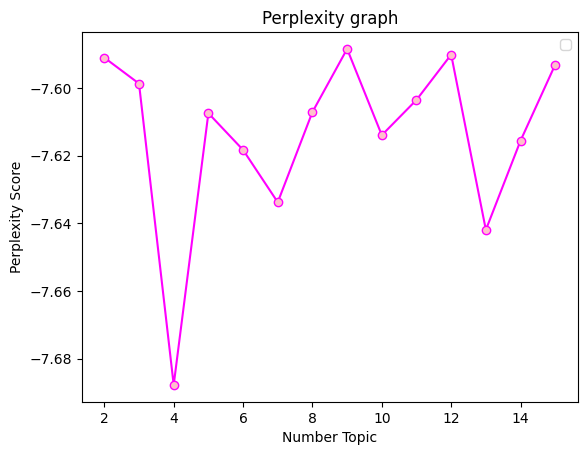

In [11]:
import matplotlib.pyplot as plt
plt.xlabel("Number Topic")
plt.ylabel("Perplexity Score")
plt.title("Perplexity graph")
# for i, data in enumerate(list_log_perplexity):
x = [i for i in range(2,16)]
plt.plot(x, list_log_perplexity, color='magenta', marker='o', mfc='pink')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


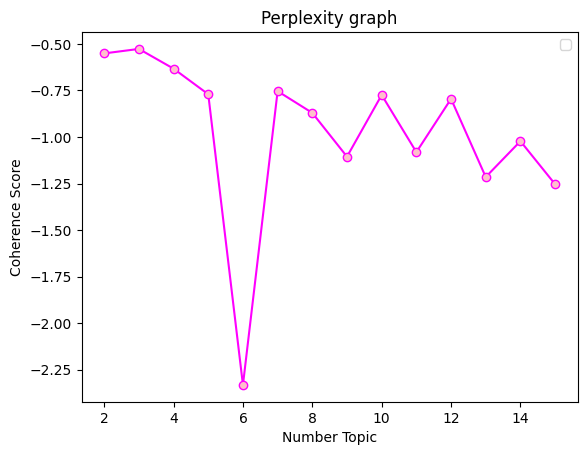

In [13]:
import matplotlib.pyplot as plt
plt.xlabel("Number Topic")
plt.ylabel("Coherence Score")
plt.title("Coherence score graph")
# for i, data in enumerate(list_log_perplexity):
x = [i for i in range(2,16)]
plt.plot(x, list_coherence, color='magenta', marker='o', mfc='pink')
plt.legend()
plt.show()

In [11]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 8.2 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached numexpr-2.8.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (381 kB)


In [12]:
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.130146 -0.049532       1        1  28.091365
3      0.067826 -0.116466       2        1  19.917575
0     -0.129163 -0.079212       3        1  19.668005
2     -0.128072  0.071795       4        1  17.541446
1     -0.062490  0.042358       5        1  14.177963
5      0.121753  0.131057       6        1   0.603646, topic_info=          Term        Freq       Total Category  logprob  loglift
580   Software  221.000000  221.000000  Default  30.0000  30.0000
930   Learning   94.000000   94.000000  Default  29.0000  29.0000
436   employee  103.000000  103.000000  Default  28.0000  28.0000
44          HR  114.000000  114.000000  Default  27.0000  27.0000
556  Developer  136.000000  136.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
918        CAS    0.174483    0.882403   Topic6  -6.8459   3.4891
991  voilation    0.174483    0.882403   Topic6  -6.8459   3.4891
957      files    0.174483    0.882403   Topic6  -6.8459   3.4891
963       json    0.174483    0.882403   Topic6  -6.8459   3.4891
406      check    0.187078    9.446969   Topic6  -6.7762   1.1880

[421 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1127      4  0.899452        AI
1127      5  0.081768        AI
608       3  0.833061    ASPNET
608       5  0.166612    ASPNET
4610      3  0.938409    ASPNet
...     ...       ...       ...
256       3  0.255400      work
256       4  0.074492      work
256       5  0.106417      work
2476      5  0.955739  workflow
2477      5  0.852357       xml

[732 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 1, 3, 2, 6])